<a href="https://colab.research.google.com/github/Vizzuality/copernicus-climate-data/blob/master/explore_pet_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare data for the copernicus-climate project

https://github.com/Vizzuality/copernicus-climate-data

`Edward P. Morris (vizzuality.)`

## Description
This notebook explores hourly PET data.  

## TODO

```
MIT License

Copyright (c) 2020 Vizzuality

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```

# Setup

Instructions for setting up the computing environment.

In [0]:
# Time setup
import time
from datetime import timedelta
start_setup_time = time.time()

In [0]:
%%bash
# Remove sample_data
rm -r sample_data

## Linux dependencies

Instructions for adding linux (including node, ect.) system packages.

``` 
!apt install -q -y <package-name>
!npm install -g <package-name>
```

In [4]:
# Packages for projections and geospatial processing
!apt install -q -y libspatialindex-dev libproj-dev proj-data proj-bin libgeos-dev

Reading package lists...
Building dependency tree...
Reading state information...
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev libspatialindex-c4v5 libspatialindex-dev
  libspatialindex4v5 proj-bin
0 upgraded, 6 newly installed, 0 to remove and 29 not upgraded.
Need to get 860 kB of archives.
After this operation, 5,014 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4

## Python packages

Consider using package versions to ensure nothing changes.

`!pip install -q <package-name>`

In [0]:
# connect to Google cloud storage
!pip install -q gcsfs 

In [6]:
# geospatial tools
!pip install -q country-converter rtree geopandas shapely fiona

     |████████████████████████████████| 51kB 1.7MB/s 
     |████████████████████████████████| 71kB 3.9MB/s 
     |████████████████████████████████| 931kB 8.6MB/s 
     |████████████████████████████████| 14.7MB 303kB/s 
     |████████████████████████████████| 10.9MB 64.5MB/s 


In [7]:
# netcdf, xarray, xclim, and Zarr tools
!pip install -q cftime netcdf4 nc-time-axis zarr xarray xclim rioxarray regionmask sparse bottleneck

     |████████████████████████████████| 327kB 2.8MB/s 
     |████████████████████████████████| 4.1MB 27kB/s 
     |████████████████████████████████| 3.3MB 41.8MB/s 
     |████████████████████████████████| 112kB 53.0MB/s 
     |████████████████████████████████| 3.7MB 64.8MB/s 
     |████████████████████████████████| 122kB 55.3MB/s 
     |████████████████████████████████| 71kB 10.0MB/s 
     |████████████████████████████████| 3.8MB 56.6MB/s 
     |████████████████████████████████| 174kB 59.9MB/s 
     |████████████████████████████████| 194kB 62.6MB/s 
     |████████████████████████████████| 18.2MB 240kB/s 
     |████████████████████████████████| 14.4MB 64.9MB/s 
     |████████████████████████████████| 634kB 60.1MB/s 
     |████████████████████████████████| 225kB 66.1MB/s 
     |████████████████████████████████| 501kB 59.9MB/s 
     |████████████████████████████████| 102kB 12.1MB/s 


In [8]:
# Show python package versions
!pip list

Package                  Version        
------------------------ ---------------
absl-py                  0.9.0          
affine                   2.3.0          
alabaster                0.7.12         
albumentations           0.1.12         
altair                   4.1.0          
asciitree                0.3.3          
asgiref                  3.2.7          
astor                    0.8.1          
astropy                  4.0.1.post1    
astunparse               1.6.3          
atari-py                 0.2.6          
atomicwrites             1.4.0          
attrs                    19.3.0         
audioread                2.1.8          
autograd                 1.3            
Babel                    2.8.0          
backcall                 0.1.0          
beautifulsoup4           4.6.3          
bleach                   3.1.5          
blis                     0.4.1          
bokeh                    1.4.0          
boltons                  20.1.0         
boto            

## Authorisation

Setting up connections and authorisation to cloud services.

### Google Cloud

This can be done in the URL or via adding service account credentials.

If you do not share the notebook, you can mount your Drive and and transfer credentials to disk. Note if the notebook is shared you always need to authenticate via URL.  

In [0]:
# Set Google Cloud information
gc_project = "skydipper-196010"
gc_creds = "skydipper-196010-f842645fd0f3.json"
gc_user = "edward-morris@skydipper-196010.iam.gserviceaccount.com"
gcs_prefix = "gs://copernicus-climate"

In [0]:
# For auth WITHOUT service account
# https://cloud.google.com/resource-manager/docs/creating-managing-projects
#from google.colab import auth
#auth.authenticate_user()
#!gcloud config set project {project_id}

In [0]:
# If the notebook is shared
#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
# If Drive is mounted, copy GC credentials to home (place in your GDrive, and connect Drive)
!cp "/content/drive/My Drive/{gc_creds}" "/root/.{gc_creds}"

In [13]:
# Auth WITH service account
!gcloud auth activate-service-account {gc_user} --key-file=/root/.{gc_creds} --project={gc_project}


Activated service account credentials for: [edward-morris@skydipper-196010.iam.gserviceaccount.com]


In [14]:
# Test GC auth
!gsutil ls {gcs_prefix}

gs://copernicus-climate/heatwaves_historical_Basque.zip
gs://copernicus-climate/heatwaves_longterm_Basque.zip
gs://copernicus-climate/spain.zarr.zip
gs://copernicus-climate/coldsnaps/
gs://copernicus-climate/data_for_PET/
gs://copernicus-climate/dataset/
gs://copernicus-climate/european-nuts-lau-geometries.zarr/
gs://copernicus-climate/heatwaves/
gs://copernicus-climate/pet/
gs://copernicus-climate/spain.zarr/
gs://copernicus-climate/tasmax/
gs://copernicus-climate/tasmin/
gs://copernicus-climate/to_delete/
gs://copernicus-climate/zonal_stats/


In [15]:
# Total time
elapsed_time_secs = time.time() - start_setup_time
msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))
print(msg)    

Execution took: 0:04:20 secs (Wall clock time)


# Utils

Generic helper functions used in the subsequent processing. For easy navigation each function seperated into a section with the function name.

## copy_gcs

In [0]:
import os
import subprocess

def copy_gcs(source_list, dest_list, opts=""):
  """
  Use gsutil to copy each corresponding item in source_list
  to dest_list.

  Example:
  copy_gcs(["gs://my-bucket/data-file.csv"], ["."])

  """
  for s, d  in zip(source_list, dest_list):
    cmd = f"gsutil -m cp -r {opts} {s} {d}"
    print(f"Processing: {cmd}")
    r = subprocess.call(cmd, shell=True)
    if r == 0:
        print("Task created")
    else:
        print("Task failed")
  print("Finished copy")

## write_to_remote_zarr

In [0]:
import gcsfs
import zarr
import xarray as xr

def write_to_remote_zarr(
    ds,
    group,
    root,
    unchunk_coords = True,
    project_id = gc_project,
    token=f"/root/.{gc_creds}",
    show_tree = True
    ):
  
  # Connect to GS
  gc = gcsfs.GCSFileSystem(project=project_id, token=token)
  store = gc.get_mapper(root, check=False, create=True)
  
  # consolidate metadata at root
  zarr.consolidate_metadata(store)
  
  # Write to zarr group
  ds.to_zarr(store=store, group=group, mode="w", consolidated=True)
  
  # consolidate metadata at root
  zarr.consolidate_metadata(store)
  c = gc.exists(f"{root}/.zmetadata")
  print(f"{root} is consoldiated? {c}")
  # unchunk coordinates
  # TODO: optimise this for remote ZARR
  #if unchunk_coords:
  #  unchunk_dataset(store, coords_only = True)
  if show_tree:
    with zarr.open_consolidated(store, mode='r') as z:
      print(z.tree())




## set_acl_to_public

In [0]:
import subprocess

# Set to asset permissions to public for https read
def set_acl_to_public(gs_path):
  """ 
  Set all Google Storage assets to puplic read access.

  Requires GS authentication

  Parameters
  ----------
  gs_path str
    The google storage path, note the "-r" option is used, setting the acl of all assets below this path
  """
  cmd = f"gsutil -m acl -r ch -u AllUsers:R {gs_path}"
  print(cmd)
  r = subprocess.call(cmd, shell=True)
  if r is 0:
    print("Set acl(s) sucsessful")
  else:
    print("Set acl(s) failed")  

#set_acl_to_public("gs://skydipper-water-quality/cloud-masks")

## rmv_remote_zarr

In [0]:
import gcsfs
import zarr

def rmv_remote_zarr(
    group,
    root,
    project_id = gc_project,
    token=f"/root/.{gc_creds}",
     show_tree=False):
  
  # Connect to GS
  gc = gcsfs.GCSFileSystem(project=project_id, token=token)
  store = gc.get_mapper(root, check=False, create=True)
  # Remove zarr group
  print(f"Removing {root}/{group}")
  zarr.storage.rmdir(store, path=group)
  # consolidate metadata at root
  zarr.consolidate_metadata(store)
  with zarr.open_consolidated(store, mode='r') as z:
    print(z.tree())

In [20]:
%%time
#rmv_remote_zarr_group('pet-minmax-monthly-era5', root = "copernicus-climate/spain.zarr")

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.68 µs


## get_size_remote_zarr

In [0]:
import os
import subprocess

def get_size_remote_zarr(
    group,
    root):
  
  # Get size using gsutil
  if group:
    p = f"gs://{root}/{group}"
  else:
    p = f"gs://{root}"  
  cmd = f"gsutil -m du -sh {p}"
  print(f"Processing: {cmd}")
  r = subprocess.getoutput(cmd)
  print(r)

## get_cached_remote_zarr

In [0]:
import gcsfs
import zarr
import xarray as xr



def get_cached_remote_zarr(
    group,
    root,
    project_id = gc_project,
    token=f"/root/.{gc_creds}"
    ):
  
  # Connect to GS
  gc = gcsfs.GCSFileSystem(project=project_id, token=token)
  store = gc.get_mapper(root, check=False, create=True)
  # Check zarr is consolidated
  consolidated = gc.exists(f'{root}/.zmetadata')
  # Cache the zarr store
  #store = zarr.ZipStore(store, mode='r')
  cache = zarr.LRUStoreCache(store, max_size=None)
  # Return cached zarr group
  return xr.open_zarr(cache, group=group, consolidated=consolidated)

## cold_spell_frequency

In [0]:
# Coldsnap events
from xclim.indices import run_length as rl

def cold_spell_frequency(da_tasmin, da_tasmin_reference, quantile=0.05, windows=[2,4,5], names=['warnings', 'alerts', 'alarms'], freq='MS'):
  # Create quantile for reference array
  da_quantile = da_tasmin_reference.quantile(quantile, dim=["time"])
  syear = da_tasmin_reference.time.dt.strftime('%Y').values[0]
  eyear = da_tasmin_reference.time.dt.strftime('%Y').values[-1]
  # Create bool array
  ba = da_tasmin < da_quantile
  # Resample to freq
  group = ba.resample(time='MS')
  # Calculate sum of events per frequency per window
  da_list = [group.map(rl.windowed_run_events, window=window, dim="time") for window in windows]
  da_dict = dict(zip(names, da_list))
  # Rename and add metadata
  if freq == 'MS': freq = 'Monthly'
  if freq == 'YS': freq = 'Yearly'
  for name, window in zip(names, windows):
    attrs = {
        'units':"",
        'standard_name': "coldsnap_events",
        'long_name': f"Number of cold snap events (Tmin < Tmin_q{quantile} for >= {window} days)",
        'description': f"{freq} number of cold snap events. "
        "An event occurs when the minimum daily "
        "temperature is lower than a specific threshold per cell : "
        f"(Tmin < Tmin_q{quantile}) "
        f"over a minimum number of days ({window}), where "
        f"Tmin_q{quantile} is calculated for the reference time-interval "
        f"{syear}--{eyear}.",
    }
    da_dict[name].attrs = attrs
    da_dict[name].name = f"coldsnap_{name}"
  # Combine into a dataset
  return xr.merge(list(da_dict.values())).drop('quantile')


## heat_wave_frequency

In [0]:
# Heatwave events
from xclim.indices import run_length as rl

def heat_wave_frequency(da_max,
                        da_max_ref,
                        da_min = None,
                        da_min_ref = None,
                        ref_text = '1981--2020',
                        thresh_name = {'min':'q90', 'max':'q95'},
                        windows = [2,4,5],
                        names = ['warnings', 'alerts', 'alarms'],
                        freq = 'MS'):
  # Get start and end years for reference array
  #syear = da_ref_max.time.dt.strftime('%Y').values[0]
  #eyear = da_ref_max.time.dt.strftime('%Y').values[-1]
  # Create bool array
  if da_min is not None:
    ba = (da_min > da_min_ref) & (da_max > da_max_ref)
  else:
    ba = (da_max > da_max_ref)
  #ba = da_max.where(cond, 1, 0)
  #ba = (da_tasmin > da_tasmin_quantile) & (da_tasmax > da_tasmax_quantile)
  # Resample to freq
  group = ba.chunk({'time':-1}).resample(time = freq)
  # Calculate sum of events per frequency per window
  da_list = [group.map(rl.windowed_run_events, window=window, dim="time") for window in windows]
  da_dict = dict(zip(names, da_list))
  # Rename and add metadata
  if freq == 'MS': freq = 'Monthly'
  if freq == 'YS': freq = 'Yearly'
  
  for name, window in zip(names, windows):
    vmax = da_max.name
    if da_min is not None:
      vmin = da_min.name
      v_txt = f"{vmin} and {vmax}"
      cond_text = f"{vmin} > {vmin}_{thresh_name['min']} & {vmax} > {vmax}_{thresh_name['max']} for >= {window} days"
    else:
      cond_text = f"{vmin} > {vmin}_{thresh_name['min']} & {vmax} > {vmax}_{thresh_name['max']} for >= {window} days"
      v_txt = f"{vmax}"
    attrs = {
        'units':"",
        'standard_name': "heat_wave_events",
        'long_name': f"Number of heat wave events ({cond_text})",
        'description': f"{freq} number of heat wave events. "
        f"An event occurs when daily {v_txt} "
        "meet specific thresholds per cell : "
        f"{cond_text}, where "
        f"thresholds were calculated for the reference time-interval "
        f"{ref_text}.",
    }
    da_dict[name].attrs = attrs
    da_dict[name].name = f"heatwave_{name}"
  # Combine into a dataset
  return xr.merge(list(da_dict.values())) 



## heat_stress_probability

In [0]:
# Heatstress events
def heat_stress_probability(da_petmax,
                          bins=[(29,35),(35,41),(41,100)],
                          names=['moderate', 'strong', 'extreme'],
                          freq='MS'):
  # Create bool array list
  cond_list = [((da_petmax > b[0]) & (da_petmax < b[1])) for b in bins]
  ba_list = [xr.where(cond, True, False) for cond in cond_list]
  # Resample to freq and calculate sum of days 
  da_list = [ba.resample(time='MS').mean('time') for ba in ba_list]
  da_dict = dict(zip(names, da_list))
  
  # Rename and add metadata
  if freq == 'MS': freq = 'Monthly'
  if freq == 'YS': freq = 'Yearly'
  for name, b in zip(names, bins):
    attrs = {
        'units':"",
        'standard_name': "heat_stress_probability",
        'long_name': f"Probability of heat stress event ({b[0]} < PETmax < {b[1]} for 1 day)",
        'description': f"{freq} probability of heat stress event. "
        "An event occurs when the maximum daily "
        "PET value is higher than specific thresholds : "
        f"({b[0]} < PETmin < {b[1]}) "
        f"over a minimum number of days (1).",
    }
    da_dict[name].attrs = attrs
    da_dict[name].name = f"heatstress_{name}"
  # Combine into a dataset
  return xr.merge(list(da_dict.values())) 



## cold_stress_probability

In [0]:
# Coldstress events
import numpy as np

def cold_stress_probability(da_petmin,
                          bins=[(13,8),(8,4),(4,-100)],
                          names=['moderate', 'strong', 'extreme'],
                          freq='MS'):
  # Create bool array list
  cond_list = [(da_petmin < b[0]) & (da_petmin > b[1]) for b in bins]
  ba_list = [xr.where(cond, 1, 0) for cond in cond_list]
  print(np.unique(ba_list[2].values))
  # Resample to freq and calculate mean 
  da_list = [ba.resample(time='MS').mean('time') for ba in ba_list]
  da_dict = dict(zip(names, da_list))
  
  # Rename and add metadata
  if freq == 'MS': freq = 'Monthly'
  if freq == 'YS': freq = 'Yearly'
  for name, b in zip(names, bins):
    attrs = {
        'units':"days",
        'standard_name': "cold_stress_probability",
        'long_name': f"Probability of cold stress event ({b[1]} < PETmin < {b[0]} for 1 day)",
        'description': f"{freq} probability of heat stress event. "
        "An event occurs when the minimum daily "
        "PET value is within specific thresholds : "
        f"({b[1]} < PETmin < {b[0]}) "
        f"over a minimum number of days (1). ",
    }
    da_dict[name].attrs = attrs
    da_dict[name].name = f"coldstress_{name}"
  # Combine into a dataset
  return xr.merge(list(da_dict.values())) 



# Processing

Data processing organised into sections.

In [0]:
# Time all processing
import time
from datetime import timedelta
start_processing_time = time.time()

## Get datasets

In [28]:
#%%time
# Here we are only reading the metadata!
ds_pet = get_cached_remote_zarr("pet-hourly-era5", 'copernicus-climate/spain.zarr')
ds_pet

,Array,Chunk
Bytes,31.69 GB,11.70 MB
Shape,"(3, 3, 3, 130008, 37, 61)","(3, 3, 3, 48, 37, 61)"
Count,2710 Tasks,2709 Chunks
Type,float32,numpy.ndarray


In [29]:
%%time
# Here we are only reading the metadata!
his = get_cached_remote_zarr("reanalysis-era5-land", 'copernicus-climate/spain.zarr')
print(his)

<xarray.Dataset>
Dimensions:  (lat: 91, lon: 151, time: 14244)
Coordinates:
  * lat      (lat) float64 35.0 35.1 35.2 35.3 35.4 ... 43.6 43.7 43.8 43.9 44.0
  * lon      (lon) float64 -10.0 -9.9 -9.8 -9.7 -9.6 ... 4.6 4.7 4.8 4.9 5.0
  * time     (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2019-12-31
Data variables:
    tasmax   (time, lat, lon) float32 dask.array<chunksize=(365, 91, 151), meta=np.ndarray>
    tasmin   (time, lat, lon) float32 dask.array<chunksize=(365, 91, 151), meta=np.ndarray>
CPU times: user 21.2 ms, sys: 776 µs, total: 21.9 ms
Wall time: 1.13 s


## Resample Adult, light clothing, walking

### 

(array([1.72562450e-04, 1.84787327e-03, 1.00105013e-02, 2.26322463e-02,
        3.11802851e-02, 3.35376563e-02, 3.21171755e-02, 2.48186778e-02,
        1.72321659e-02, 1.28240898e-02, 8.85946684e-03, 3.93854821e-03,
        7.65779784e-04, 5.91386439e-05, 3.63205915e-06, 2.00679940e-07]),
 array([-20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.,
         35.,  40.,  45.,  50.,  55.,  60.], dtype=float32),
 <a list of 16 Patch objects>)

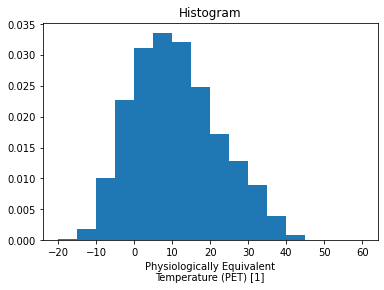

In [30]:
# Histogram of PET
ds_pets = ds_pet.sel(met=80.0, clo=0.9, gender='female', age_cat='adult')
# mask water
mask = (his.tasmax.mean('time').interp_like(ds_pets) > -400)
ds_pets = ds_pets.where(mask)
ds_pets.pet.plot.hist(bins=16, density=True, stacked=True, range=(-20, 60))

(array([1.48634480e-07, 1.46256328e-05, 2.15193000e-04, 1.81559990e-03,
        8.69413610e-03, 2.13643337e-02, 3.05514012e-02, 3.21299589e-02,
        3.00991065e-02, 2.84263146e-02, 2.50984778e-02, 1.57738045e-02,
        5.02117001e-03, 7.21085317e-04, 6.99473864e-05, 4.69684957e-06]),
 array([-20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.,
         35.,  40.,  45.,  50.,  55.,  60.], dtype=float32),
 <a list of 16 Patch objects>)

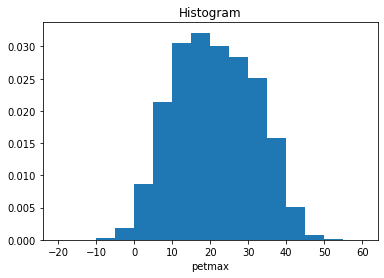

In [31]:
# Histogram of daily maximum PET
da_petmax = ds_pets.pet.resample(time='D').max().rename('petmax')
da_petmax.plot(bins=16, density=True, stacked=True, range=(-20, 60))

(array([6.32739441e-04, 6.39633401e-03, 2.60406408e-02, 4.20695442e-02,
        4.32694145e-02, 4.10491311e-02, 3.00677485e-02, 9.87715933e-03,
        5.94819686e-04, 2.46850170e-06, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([-20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.,
         35.,  40.,  45.,  50.,  55.,  60.], dtype=float32),
 <a list of 16 Patch objects>)

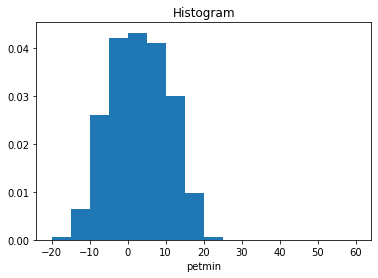

In [32]:
# Histogram of daily minimum PET
da_petmin = ds_pets.pet.resample(time='D').min().rename('petmin')
da_petmin.plot(bins=16, density=True, stacked=True, range=(-20, 60))

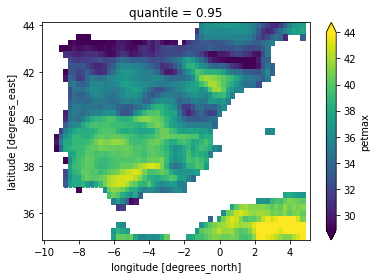

In [33]:
#PETmaxq95
da_petmax_q95 = da_petmax.chunk({'time':-1}).quantile(0.95, dim=["time"])
da_petmax_q95.plot(robust=True)

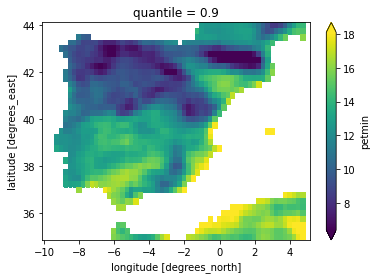

In [34]:
#PETminq90
da_petmin_q90 = da_petmin.chunk({'time':-1}).quantile(0.90, dim=["time"])
da_petmin_q90.plot(robust=True)

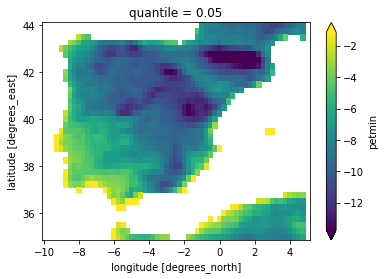

In [35]:
#PETminq05
da_petmin_q05 = da_petmin.chunk({'time':-1}).quantile(0.05, dim=["time"])
da_petmin_q05.plot(robust=True)

### Heat stress

In [36]:
# Monthly heatstress proability
ds_hs = heat_stress_probability(da_petmax).chunk({'time':-1})
ds_hs = ds_hs.chunk({'time':-1})
ds_hs = ds_hs.where(da_petmin_q90 > 0)
ds_hs

<xarray.Dataset>
Dimensions:              (lat: 37, lon: 61, time: 178)
Coordinates:
  * time                 (time) datetime64[ns] 2005-01-01 ... 2019-10-01
    age_cat              <U5 'adult'
    clo                  float64 0.9
    gender               <U6 'female'
  * lat                  (lat) float64 44.0 43.75 43.5 43.25 ... 35.5 35.25 35.0
  * lon                  (lon) float64 -10.0 -9.75 -9.5 -9.25 ... 4.5 4.75 5.0
    met                  float64 80.0
    quantile             float64 0.9
Data variables:
    heatstress_moderate  (time, lat, lon) float64 dask.array<chunksize=(178, 37, 61), meta=np.ndarray>
    heatstress_strong    (time, lat, lon) float64 dask.array<chunksize=(178, 37, 61), meta=np.ndarray>
    heatstress_extreme   (time, lat, lon) float64 dask.array<chunksize=(178, 37, 61), meta=np.ndarray>

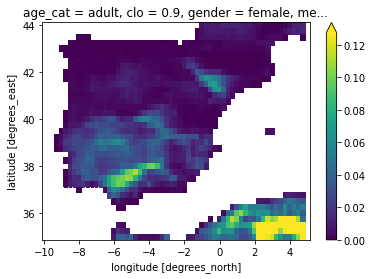

In [37]:
# Weighted time-ensemble average
weights = ds_hs.time.dt.daysinmonth 
ds_hs.heatstress_extreme.weighted(weights).mean('time').plot(robust=True)

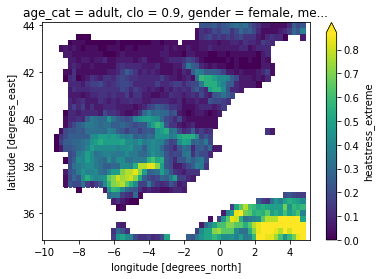

In [38]:
# Probability of at least 1 event in time-interval  
ds_hs.heatstress_extreme.max('time').plot(robust=True)

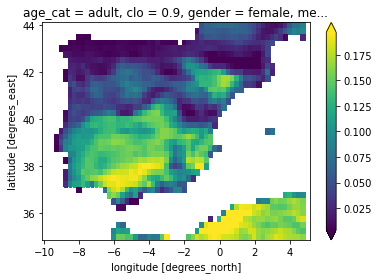

In [39]:
# Weighted time-ensemble average
weights = ds_hs.time.dt.daysinmonth 
ds_hs.heatstress_strong.weighted(weights).mean('time').plot(robust=True)

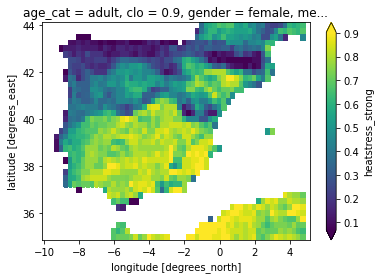

In [40]:
# Probability of at least 1 event in time-interval  
ds_hs.heatstress_strong.max('time').plot(robust=True)

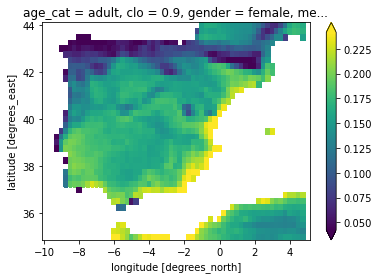

In [41]:
# Weighted time-ensemble average
weights = ds_hs.time.dt.daysinmonth 
ds_hs.heatstress_moderate.weighted(weights).mean('time').plot(robust=True)

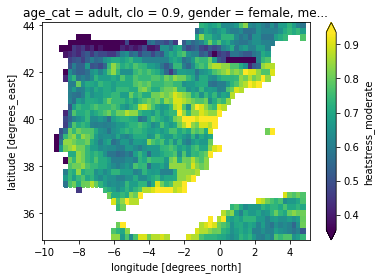

In [42]:
# Probability of at least 1 event in time-interval  
ds_hs.heatstress_moderate.max('time').plot(robust=True)

### Cold stress

In [45]:
# Monthly coldstress frequency
# Use daily maximum PET!
ds_cs = cold_stress_probability(da_petmax).chunk({'time':-1})
ds_cs = ds_cs.chunk({'time':-1})
ds_cs = ds_cs.where(da_petmin_q90 > 0)
ds_cs

[0 1]


<xarray.Dataset>
Dimensions:              (lat: 37, lon: 61, time: 178)
Coordinates:
  * time                 (time) datetime64[ns] 2005-01-01 ... 2019-10-01
    age_cat              <U5 'adult'
    clo                  float64 0.9
    gender               <U6 'female'
  * lat                  (lat) float64 44.0 43.75 43.5 43.25 ... 35.5 35.25 35.0
  * lon                  (lon) float64 -10.0 -9.75 -9.5 -9.25 ... 4.5 4.75 5.0
    met                  float64 80.0
    quantile             float64 0.9
Data variables:
    coldstress_moderate  (time, lat, lon) float64 dask.array<chunksize=(178, 37, 61), meta=np.ndarray>
    coldstress_strong    (time, lat, lon) float64 dask.array<chunksize=(178, 37, 61), meta=np.ndarray>
    coldstress_extreme   (time, lat, lon) float64 dask.array<chunksize=(178, 37, 61), meta=np.ndarray>

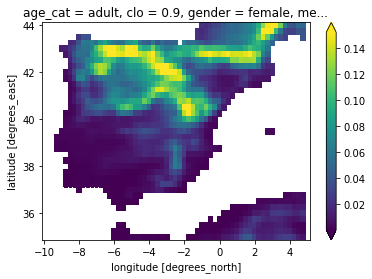

In [46]:
# Weighted time-ensemble average
weights = ds_cs.time.dt.daysinmonth
ds_cs.coldstress_extreme.weighted(weights).mean('time').plot(robust=True)

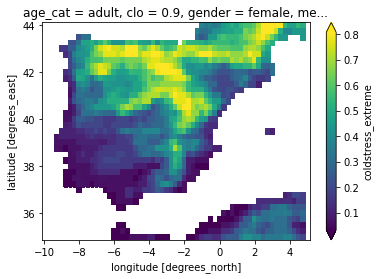

In [47]:
# Probability of at least 1 event in time-interval  
ds_cs.coldstress_extreme.max('time').plot(robust=True)

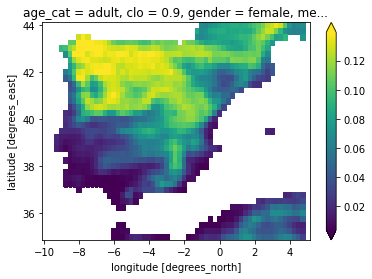

In [48]:
# Weighted time-ensemble average
weights = ds_cs.time.dt.daysinmonth / ds_cs.time.size
ds_cs.coldstress_strong.weighted(weights).mean('time').plot(robust=True)

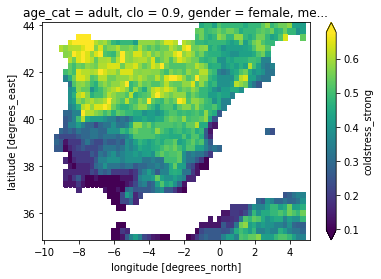

In [49]:
# Probability of at least 1 event in time-interval  
ds_cs.coldstress_strong.max('time').plot(robust = True)

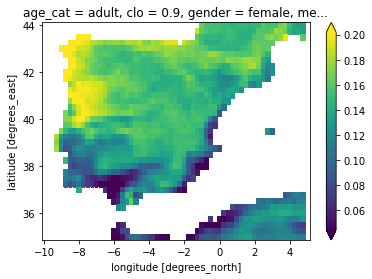

In [50]:
# Weighted time-ensemble average
weights = ds_cs.time.dt.daysinmonth / ds_cs.time.size
ds_cs.coldstress_moderate.weighted(weights).mean('time').plot(robust=True)

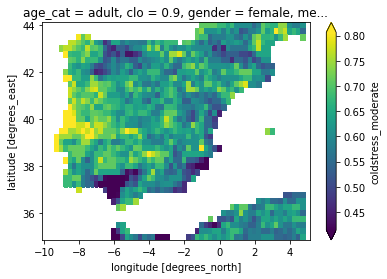

In [51]:
# Probability of at least 1 event in time-interval  
ds_cs.coldstress_moderate.max('time').plot(robust=True)

### Heatwaves using PETmax and PETmin

In [283]:
# Heatwave frequency
ds_hw = heat_wave_frequency(da_petmax,\
                            da_petmax_q95,\
                            da_petmin,\
                            da_petmin_q90,\
                            ref_text = '2005--2020',\
                            thresh_name = {'min':'q90', 'max':'q95'},\
                            windows = [2,4,5],\
                            names = ['warnings', 'alerts', 'alarms'],\
                            freq = 'MS')
ds_hw = ds_hw.chunk({'time':-1})
ds_hw = ds_hw.where(da_petmin_q90 > 0)
nmonths = ds_hw.time.size
ds_hw = ds_hw / nmonths
ds_hw

<xarray.Dataset>
Dimensions:            (lat: 37, lon: 61, time: 178)
Coordinates:
    age_cat            <U5 'adult'
    quantile           float64 0.9
    gender             <U6 'female'
    clo                float64 0.9
  * time               (time) datetime64[ns] 2005-01-01 ... 2019-10-01
  * lat                (lat) float64 44.0 43.75 43.5 43.25 ... 35.5 35.25 35.0
    met                float64 80.0
  * lon                (lon) float64 -10.0 -9.75 -9.5 -9.25 ... 4.5 4.75 5.0
Data variables:
    heatwave_warnings  (time, lat, lon) float64 dask.array<chunksize=(178, 37, 61), meta=np.ndarray>
    heatwave_alerts    (time, lat, lon) float64 dask.array<chunksize=(178, 37, 61), meta=np.ndarray>
    heatwave_alarms    (time, lat, lon) float64 dask.array<chunksize=(178, 37, 61), meta=np.ndarray>

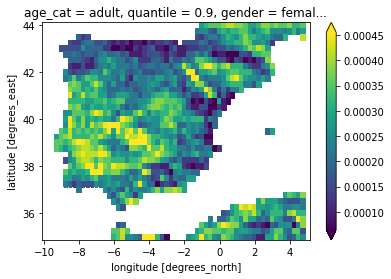

In [284]:
# Weighted time-ensemble average
weights = ds_hw.time.dt.daysinmonth 
ds_hw.heatwave_alerts.weighted(weights).mean('time').plot(robust=True)

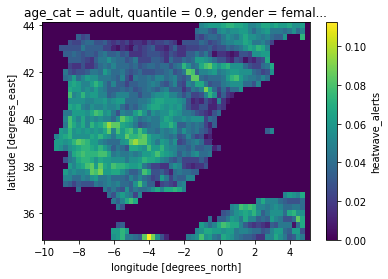

In [285]:
ds_hw.heatwave_alerts.sum('time').plot()

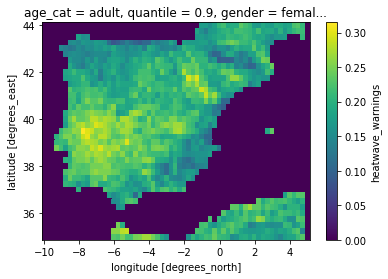

In [286]:
ds_hw.heatwave_warnings.sum('time').plot()

In [287]:
# Total time
elapsed_time_secs = time.time() - start_processing_time
msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))
print(msg)    

Execution took: 5:54:40 secs (Wall clock time)
